<a href="https://colab.research.google.com/github/DarielAngel/Inteligencia-Artificial/blob/main/Electrical_Grid_Stability_Simulated_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install -U ucimlrepo

#  Electrical Grid Stability Simulated Data
El análisis se realiza para diferentes conjuntos de valores de entrada utilizando una metodología similar a la descrita en [Schäfer, Benjamin, et al. 'Taming instabilities in power grid networks by decentralized control'. The European Physical Journal Special Topics 225.3 (2016): 569-582.]. Varios valores de entrada se mantienen iguales: tiempo promedio: 2 s; fuerza de acoplamiento: 8 s^-2; amortiguamiento: 0,1 s^-1

In [26]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
#list_available_datasets()

electrical = fetch_ucirepo(id=471)

print(electrical)

{'data': {'ids': None, 'features':           tau1      tau2      tau3      tau4        p1        p2        p3  \
0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...        ...       ...       ...       ...       ...       ...       ...   
9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   

            p4        g1    

# Definiendo Datos de entrenamiento y de pruebas

In [42]:
electrical.data.original['stabf'] = electrical.data.original['stabf'].map({'stable': 0, 'unstable': 1})

In [43]:
from sklearn.model_selection import train_test_split

entrena, prueba, entrena_clase, prueba_clase = train_test_split(electrical.data.original[["tau1", "tau2", "tau3", "tau4", "p1", "p2", "p3", "p4", "g1", "g2",
       "g3", "g4", "stab"]], electrical.data.original["stabf"], test_size = 0.2)

valida.shape[0]

2000

# Definir el Modelo de red neuronal

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=entrena.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [46]:
history = model.fit(entrena, entrena_clase, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.5499 - mean_absolute_error: 2.3853 - val_loss: 0.2811 - val_mean_absolute_error: 0.4293
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2725 - mean_absolute_error: 0.4275 - val_loss: 0.2245 - val_mean_absolute_error: 0.4017
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2187 - mean_absolute_error: 0.3981 - val_loss: 0.1994 - val_mean_absolute_error: 0.3803
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1986 - mean_absolute_error: 0.3815 - val_loss: 0.1889 - val_mean_absolute_error: 0.3659
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1898 - mean_absolute_error: 0.3713 - val_loss: 0.1783 - val_mean_absolute_error: 0.3542
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1798 - mean_absolute_error: 0.3598 - val_loss: 0.1679 - val_mean_absolute_error: 0.3433
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1705 - mean_absolute_error: 0.3

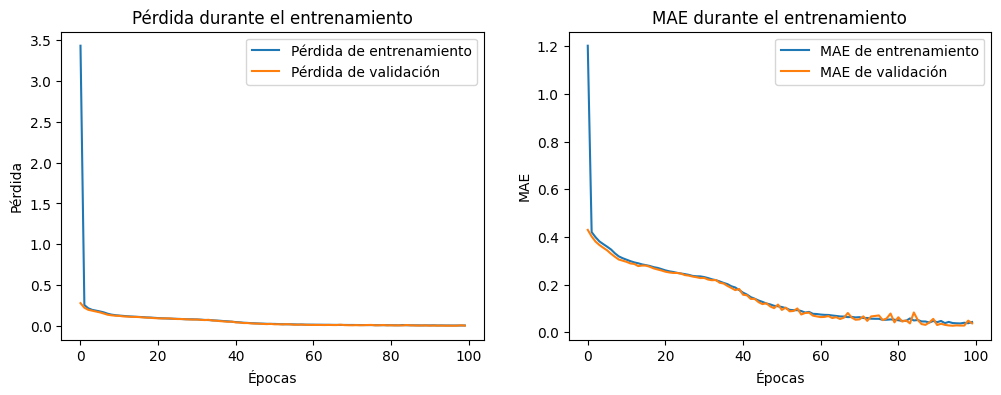

In [48]:
import matplotlib.pyplot as plt

# Graficar la pérdida y el MAE durante el entrenamiento
plt.figure(figsize=(12, 4))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='MAE de entrenamiento')
plt.plot(history.history['val_mean_absolute_error'], label='MAE de validación')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.title('MAE durante el entrenamiento')


plt.show()

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Hacer predicciones
predictions = model.predict(prueba)

# Calcular MSE
mse = mean_squared_error(prueba_clase, predictions)
print(f'Error Cuadrático Medio (MSE): {mse}')

# Calcular MAE
mae = mean_absolute_error(prueba_clase, predictions)
print(f'Error Absoluto Medio (MAE): {mae}')

# Calcular R²
r2 = r2_score(prueba_clase, predictions)
print(f'Coeficiente de Determinación (R²): {r2}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Error Cuadrático Medio (MSE): 0.004834300838410854
Error Absoluto Medio (MAE): 0.035415757447481155
Coeficiente de Determinación (R²): 0.9791422486305237
